Bike Sharing Dataset Exploratory Analysis
Based on Bike Sharing dataset from UCI Machine Learning Repository





https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

The provided URL are just supportive to understand the techniques. Read it ,understand and gain knowledge and prepare your own model with your inputs.

EDA

https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends/bike_sharing_eda.ipynb

Decision tree

https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends/decision_tree_regression.ipynb

Linear Regression

https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends/linear_regression.ipynb

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/RaviSolanki01/DataScience/master/Data/hour.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.drop(columns=['instant','dteday'],inplace=True)

In [7]:
# checking numbers of unique value in each columns
uni = []
continous = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
    if len(np.unique(data[col])) > 24 :
        continous.append(col)
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,season,4
1,yr,2
2,mnth,12
3,hr,24
4,holiday,2
5,weekday,7
6,workingday,2
7,weathersit,4
8,temp,50
9,atemp,65


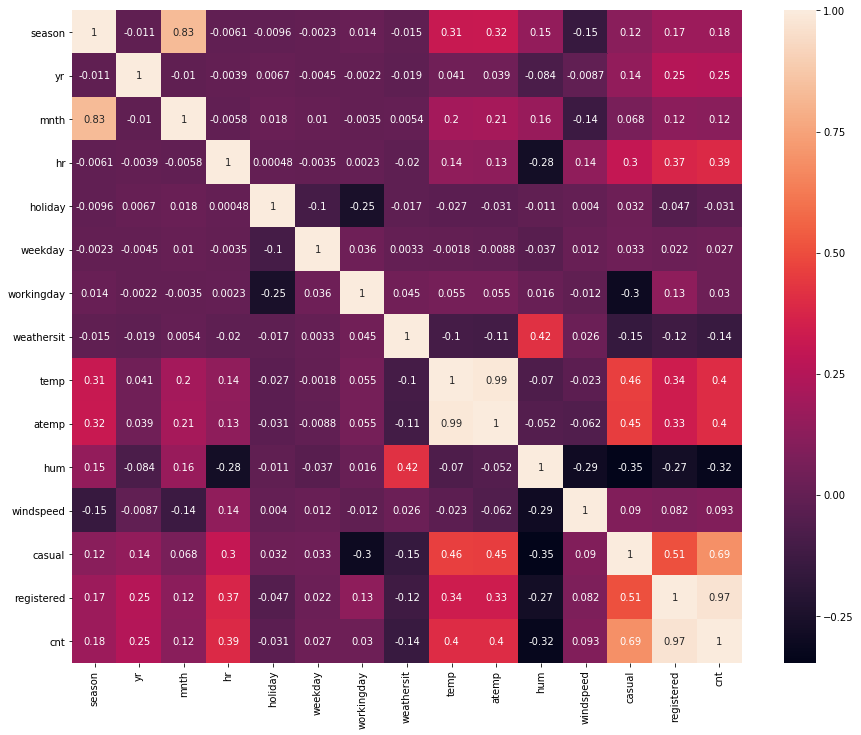

In [8]:
data_corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data_corr,annot=True)

/home/direwolf/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


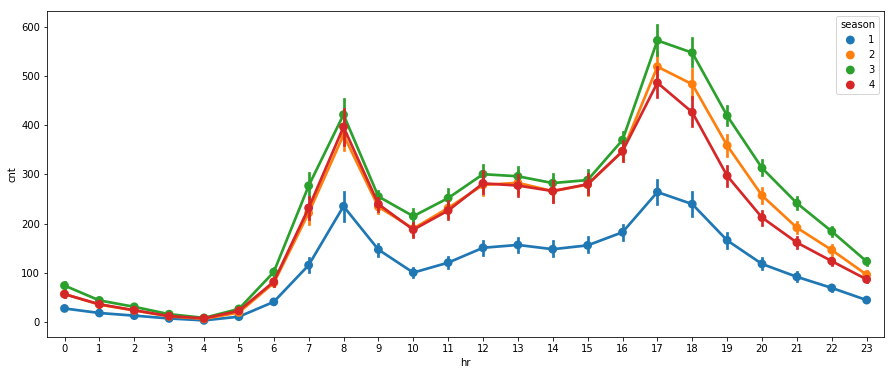

In [9]:
plt.figure(figsize=(15,6))
sns.pointplot(data=data,x='hr',y='cnt',hue='season')

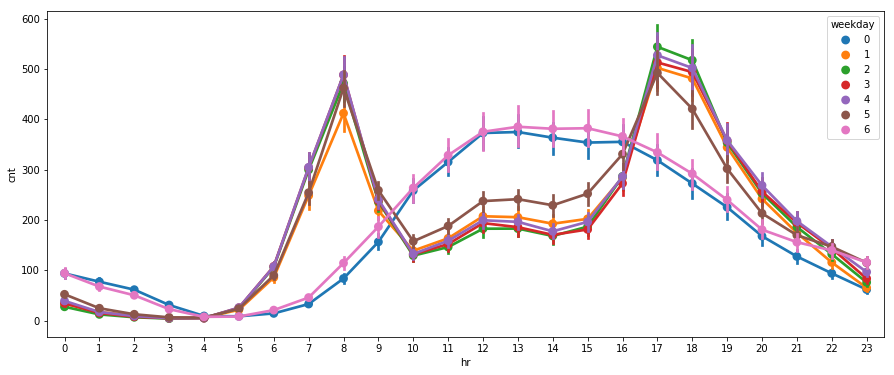

In [10]:
plt.figure(figsize=(15,6))
sns.pointplot(data=data,x='hr',y='cnt',hue='weekday')

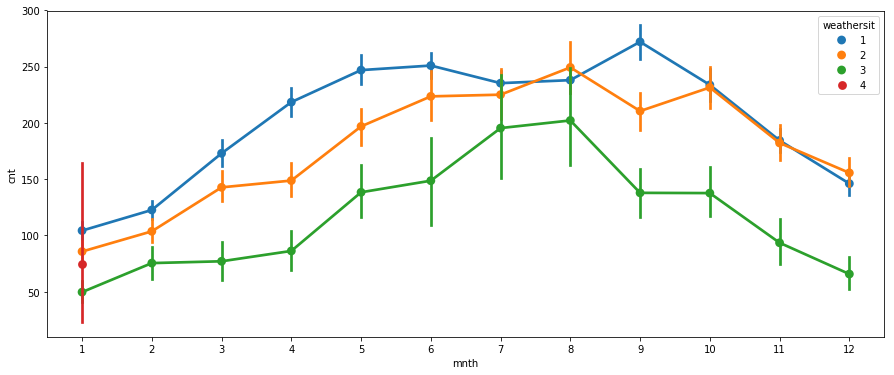

In [11]:
plt.figure(figsize=(15,6))
sns.pointplot(data=data,x='mnth',y='cnt',hue='weathersit')

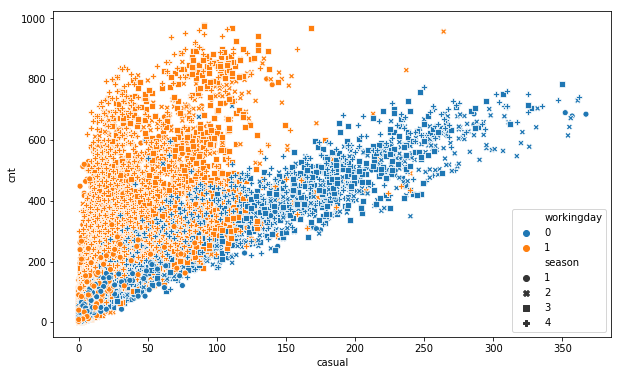

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='casual',y='cnt',data=data,hue='workingday',style='season')

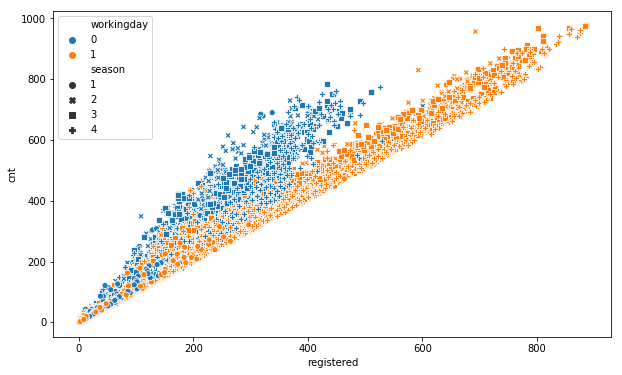

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='registered',y='cnt',data=data,hue='workingday',style='season')

In [14]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
X = data.drop(columns=['cnt'])
y = data['cnt'].values.reshape(-1,1)
print(X.shape,y.shape)

(17379, 14) (17379, 1)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
lr = LinearRegression(normalize=True,copy_X=False,n_jobs=-1)

In [20]:
scores = cross_val_score(lr,X_train,y_train,cv=100)

In [21]:
scores.mean()

1.0

In [22]:
mse = cross_val_score(lr,X_train,y_train,cv=100, scoring='neg_mean_squared_error')

In [23]:
mse.mean()

-6.302732390600629e-26

In [24]:
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

2.5282218430501983e-26

In [26]:
lr.score(X_train,y_train)

1.0

In [27]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
dtr.score(X_train,y_train)

1.0

In [29]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [30]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [31]:
grid_cv_dtr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.9970759053160924
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [33]:
best_dtr_model = grid_cv_dtr.best_estimator_
y_pred = best_dtr_model.predict(X_test)
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % mean_squared_error(y_test, y_pred))

R-squared::0.9968498024316226
MSE: 104.65
